In [1]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt 
import numpy as np

def uw(x,l):
    v=-np.exp(-.5*(x**2))*np.sin(np.pi*(x/l))
    z=np.linspace(-l,l,1000)
    vz=-np.exp(-.5*(z**2))*np.sin(np.pi*(z/l))
    A=np.trapz(x=z,y=np.abs(vz))
    return v/A

def intu(u,dx):
    I=np.zeros(len(u))
    for ii in range(1,len(u)):
        I[ii]=I[ii-1]+(u[ii-1]+u[ii])*dx/2.
    return I

def get_RX(X,D,L):
    x=np.linspace(-X,0,1000)
    u=uw(x,L)
    dx=x[1]-x[0]
    I=intu(u,dx)
    V=np.trapz(x=x,y=np.power(.75*I,1./3.))
    return D*L-V

def get_X(D,L):
    X=fsolve(get_RX,0.5*L,args=(D,L))
    return X

def get_h_VB(D,L):
    X=get_X(D,L)
    x=np.linspace(-X,0,1000)
    u=uw(x,L)
    dx=x[1]-x[0]
    I=intu(u,dx)
    return x,np.power(.75*I,1./3.)

def extend_h_VB(D,L): #mainly to make plots 
    x,h=get_h_VB(D,L)
    xe=np.linspace(-L,x[0],100)
    he=np.zeros(len(xe))
    xe=np.append(xe,x)
    he=np.append(he,h)
    return xe,he

def plot_h_VB(D,L,style='k-',style_2='ro'):
    x,h=extend_h_VB(D,L)
    plt.plot(x,h,style)
    plt.plot(x[0],h[0],style_2)
    
def get_RH(H,D,L):
    x=np.linspace(-L,0,1000)
    u=uw(x,L)
    dx=x[1]-x[0]
    I=intu(u,dx)
    V=np.trapz(x=x,y=np.power(.75*I+np.power(H,3),1./3.))
    return D*L-V

def get_H(D,L):
    H=fsolve(get_RH,0.1*D,args=(D,L))
    return H

def get_h_VA(D,L):
    H=get_H(D,L)
    x=np.linspace(-L,0,1000)
    u=uw(x,L)
    dx=x[1]-x[0]
    I=intu(u,dx)
    return x,np.power(.75*I+np.power(H,3),1./3.)

def D_crit(L):
    x=np.linspace(-L,0,1000)
    u=uw(x,L)
    dx=x[1]-x[0]
    I=intu(u,dx)
    return 1./L*np.trapz(x=x,y=np.power(.75*I,1./3.))   

In [2]:
L=np.linspace(2,10,5)
D=np.linspace(0.2,0.4,3)
N=200
T=5*10**3
t=np.linspace(0,T,10*T)
xall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
tall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
uall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
hall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
for ii in range(0,len(L)):
    for jj in range(0,len(D)):
        file_name='data_l_'+'{:1.0E}'.format(L[ii])+'_d_'+'{:1.0E}'.format(D[jj])+'.npy'
        if jj==0:
            data=np.load('../numerical/long_'+file_name)
        else:
            data=np.load('../numerical/'+file_name)
        xall[ii][jj]=data[0]
        tall[ii][jj]=data[1]
        uall[ii][jj]=data[2]
        hall[ii][jj]=data[3]

In [3]:
xsall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
hsall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
Dcrit=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
for ii in range(0,len(L)):
    for jj in range(0,len(D)):
        Dcrit[ii][jj]=D_crit(L[ii])
        if D[jj]>Dcrit[ii][jj]:
            xs,hs=get_h_VA(D[jj],L[ii])
        else:
            xs,hs=extend_h_VB(D[jj],L[ii])
        xsall[ii][jj]=xs
        hsall[ii][jj]=hs

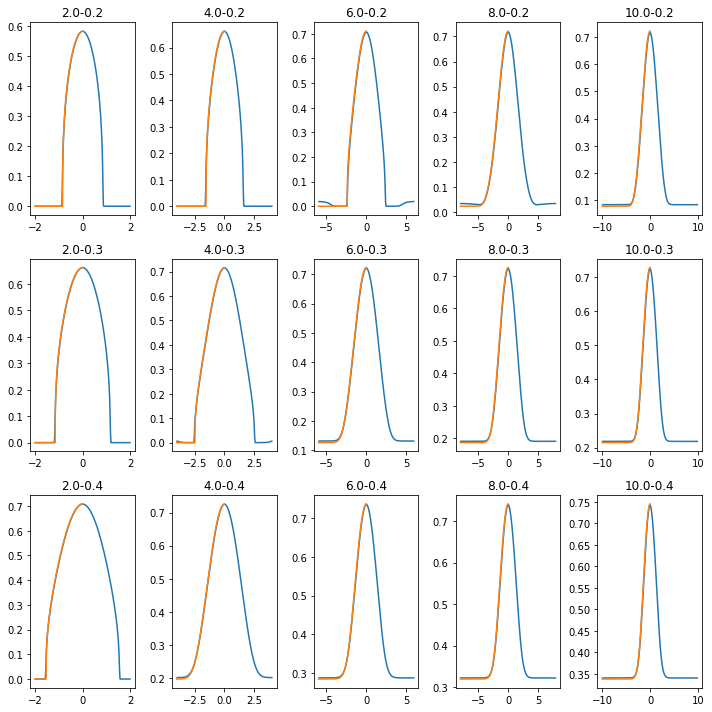

In [4]:
plt.figure(figsize=(10,10),facecolor='white')
for ii in range(0,len(L)):
    for jj in range(0,len(D)):
        plt.subplot(3,5,5*jj+1+ii)
        plt.plot(xall[ii][jj],hall[ii][jj][-1])
        plt.plot(xsall[ii][jj],hsall[ii][jj])
        plt.title(str(L[ii])+'-'+str(D[jj]))
        
plt.tight_layout()
plt.show()

In [5]:
Vpsall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
Vpsnall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
for ii in range(0,len(L)):
    for jj in range(0,len(D)):
        h=np.copy(hsall[ii][jj])
        h-=D[jj]
        h[h<0]=0.
        Vp=np.trapz(x=xsall[ii][jj],y=h)
        Vpsall[ii][jj]=Vp
        Vpsnall[ii][jj]=Vp/(2.*D[jj]*L[ii])


[0.46100189168482708, 0.34254955273722576, 0.24809541555099626, 0.19047995919480704, 0.15391569960756743]


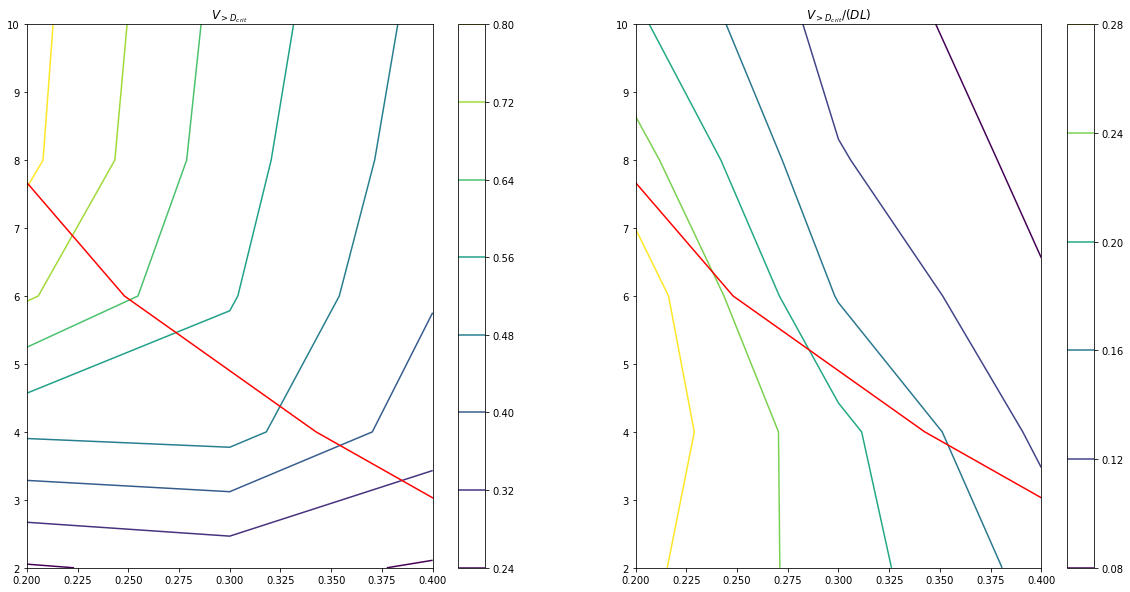

In [6]:
DCplot=[]
for ii in range(0,len(L)):
    DCplot.append(Dcrit[ii][0])
print(DCplot)

plt.figure(0,figsize=(20,10),facecolor='white')
plt.subplot(1,2,1)
plt.contour(D,L,Vpsall)
plt.title('$V_{>D_{crit}}$')
plt.plot(DCplot,L,'r')
plt.xlim([0.2,0.4])
plt.colorbar()
plt.subplot(1,2,2)
plt.contour(D,L,Vpsnall)
plt.colorbar()
plt.title('$V_{>D_{crit}}/(DL)$')
plt.plot(DCplot,L,'r')
plt.xlim([0.2,0.4])

plt.show()

In [7]:
Vpall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
for ii in range(0,len(L)):
    for jj in range(0,len(D)):
        h=np.copy(hall[ii][jj])
        h-=D[jj]
        h[h<0]=0.
        Vp=np.trapz(x=xall[ii][jj],y=h,axis=1)
        Vpall[ii][jj]=Vp

In [8]:
Vdotall=[[[] for jj in range(0,len(D))] for ii in range(0,len(L))]
for ii in range(0,len(L)):
    for jj in range(0,len(D)):
        dt=tall[ii][jj][1]-tall[ii][jj][0]
        Vdotall[ii][jj]=(Vpall[ii][jj][1:]-Vpall[ii][jj][:-1])/dt

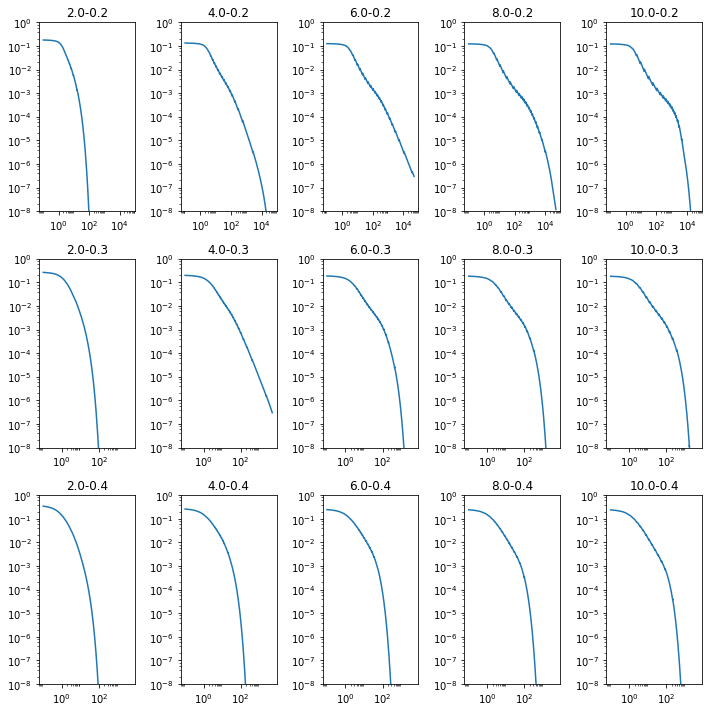

In [9]:
plt.figure(figsize=(10,10),facecolor='white')
for ii in range(0,len(L)):
    for jj in range(0,len(D)):
        plt.subplot(3,5,5*jj+1+ii)
        plt.loglog(tall[ii][jj][1:],Vdotall[ii][jj])
        plt.title(str(L[ii])+'-'+str(D[jj]))
        plt.ylim([10**-8,10**0])
plt.tight_layout()
plt.show()

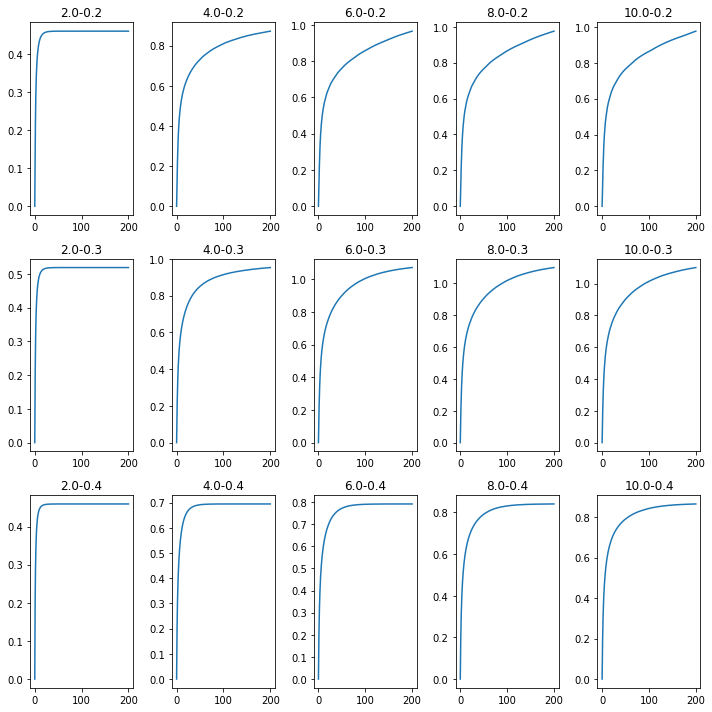

In [10]:
plt.figure(figsize=(10,10),facecolor='white')
for ii in range(0,len(L)):
    for jj in range(0,len(D)):
        plt.subplot(3,5,5*jj+1+ii)
        plt.plot(tall[ii][jj][:2000],Vpall[ii][jj][:2000])
        plt.title(str(L[ii])+'-'+str(D[jj]))
plt.tight_layout()
plt.show()

In [11]:
Vpmaxall=np.zeros([len(L),len(D)])
t90=np.zeros([len(L),len(D)])
t50=np.zeros([len(L),len(D)])
t10=np.zeros([len(L),len(D)])

for ii in range(0,len(L)):
    for jj in range(0,len(D)):
        Vpmaxall[ii,jj]=np.max(Vpall[ii][jj])
        idx=np.min(np.where(Vpall[ii][jj]>0.9*Vpmaxall[ii,jj]))
        t90[ii,jj]=tall[ii][jj][idx]
        idx=np.min(np.where(Vpall[ii][jj]>0.5*Vpmaxall[ii,jj]))
        t50[ii,jj]=tall[ii][jj][idx]        
        idx=np.min(np.where(Vpall[ii][jj]>0.1*Vpmaxall[ii,jj]))
        t10[ii,jj]=tall[ii][jj][idx]

[0.46100189168482708, 0.34254955273722576, 0.24809541555099626, 0.19047995919480704, 0.15391569960756743]


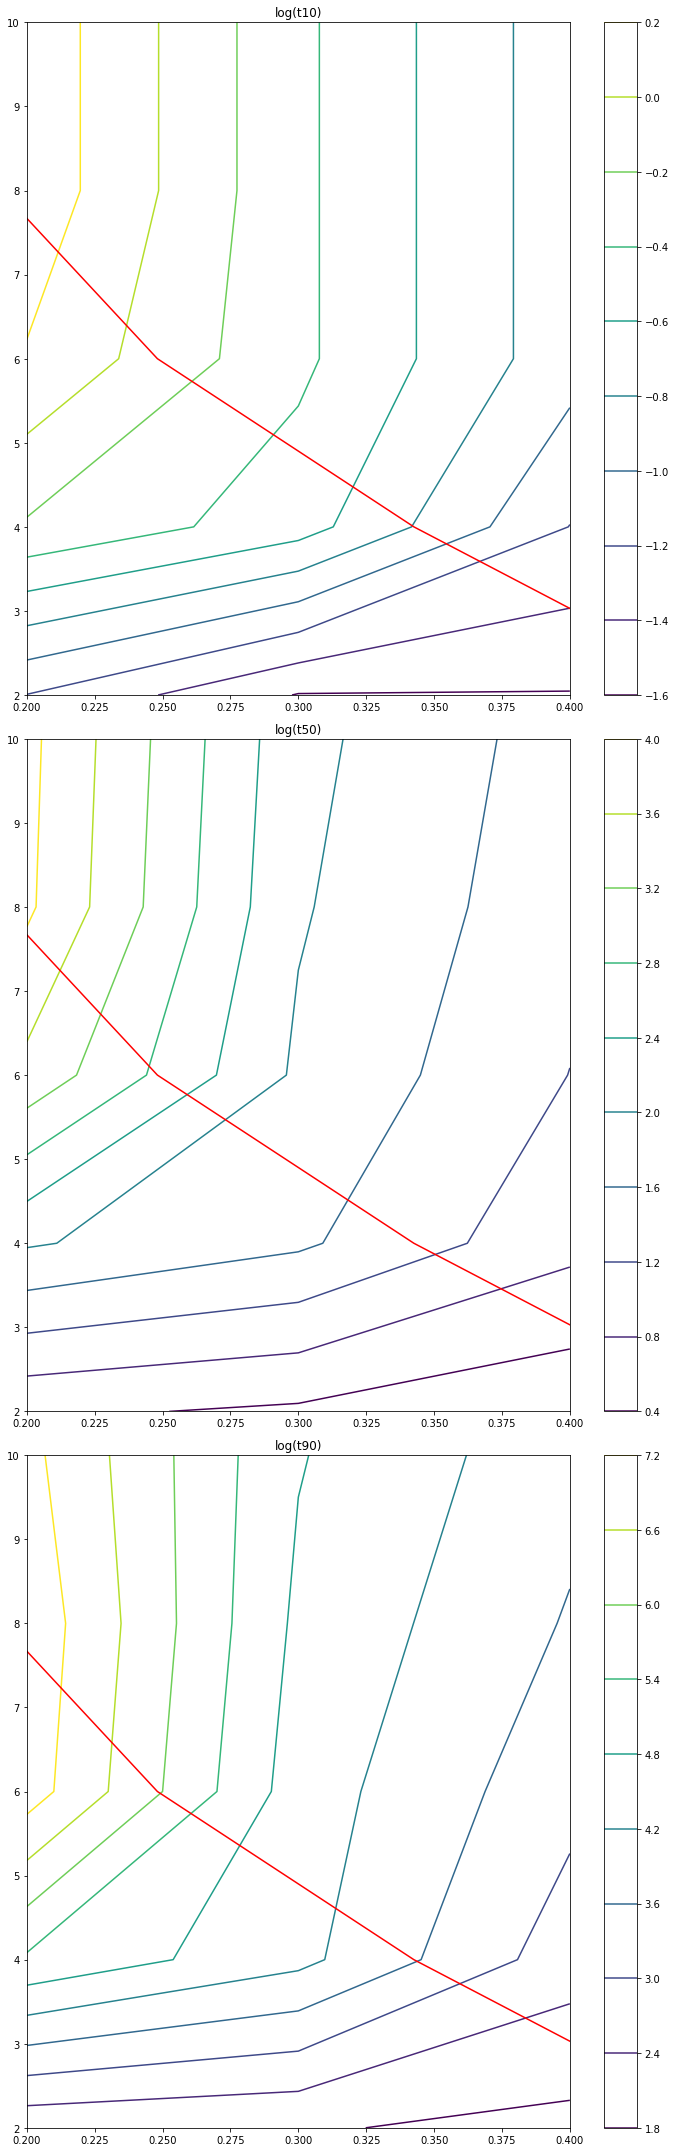

In [12]:
DCplot=[]
for ii in range(0,len(L)):
    DCplot.append(Dcrit[ii][0])
print(DCplot)

plt.figure(0,figsize=(10,30),facecolor='white')

plt.subplot(311)
plt.contour(D,L,np.log(t10),10)
plt.plot(DCplot,L,'r')
plt.xlim([0.2,0.4])
plt.colorbar()
plt.title('log(t10)')

plt.subplot(312)
plt.contour(D,L,np.log(t50),10)
plt.plot(DCplot,L,'r')
plt.xlim([0.2,0.4])
plt.colorbar()
plt.title('log(t50)')

plt.subplot(313)
plt.contour(D,L,np.log(t90),10)
plt.plot(DCplot,L,'r')
plt.xlim([0.2,0.4])
plt.colorbar()
plt.title('log(t90)')

plt.tight_layout()
plt.show()

In [92]:
print(L)
print(D)
ha=np.copy(hall[2][0])
xa=np.copy(xall[2][0])
Vdota=np.copy(Vdotall[2][0])
ta=np.copy(tall[2][0])
hb=np.copy(hall[2][2])
xb=np.copy(xall[2][2])
Vdotb=np.copy(Vdotall[2][2])
tb=np.copy(tall[2][2])


[  2.   4.   6.   8.  10.]
[ 0.2  0.3  0.4]


In [14]:
print(len(ta))

500000


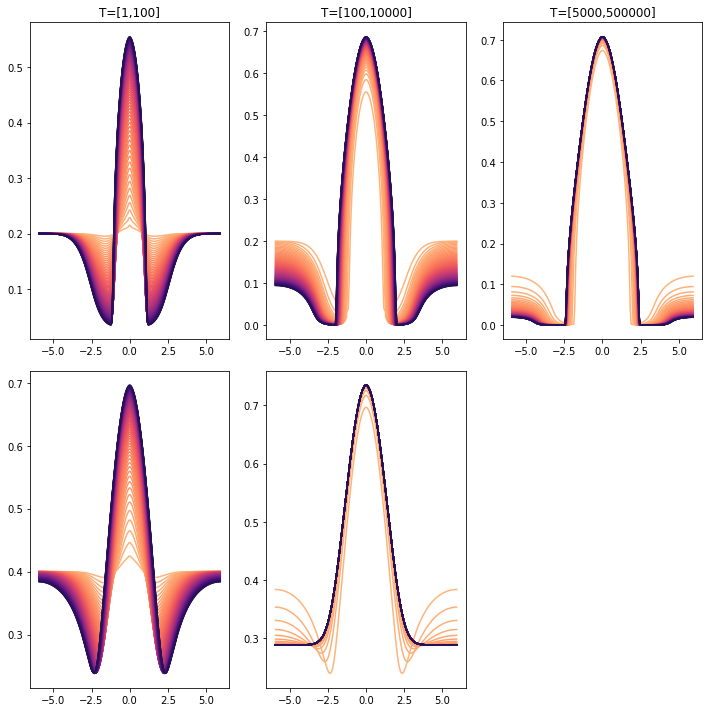

In [93]:
plt.figure(figsize=(10,10),facecolor='white')
C=np.linspace(.15,.85,100)
for ii in range(0,2):
    plt.subplot(2,3,1+ii)
    for tt in range(10**(2*ii),10**(2*ii+2),10**(2*ii)):
        plt.plot(xa,ha[tt],color=plt.cm.magma_r(C[int(tt/(10**(2*ii)))]))
    plt.title('T=['+str(10**(2*ii))+','+str(10**(2*ii+2))+']')
    plt.subplot(2,3,4+ii)
    for tt in range(10**(2*ii),10**(2*ii+2),10**(2*ii)):
        plt.plot(xb,hb[tt],color=plt.cm.magma_r(C[int(tt/(10**(2*ii)))]))
plt.subplot(2,3,3)
for tt in range(5*10**3,5*10**5,5*10**3):
    plt.plot(xa,ha[tt],color=plt.cm.magma_r(C[int(tt/(5*10**3))]))
plt.title('T=['+str(5*10**3)+','+str(5*10**5)+']')
plt.tight_layout()
plt.show()

In [116]:
def q(h2,h1,h0,u1,u0,dx):
    A=(h1*u1-h0*u0)/dx
    D=(4./3.)*(h2-h0)/dx*h1**3
    return A-D

-4.14904522613
-3.55206030151
-2.95507537688


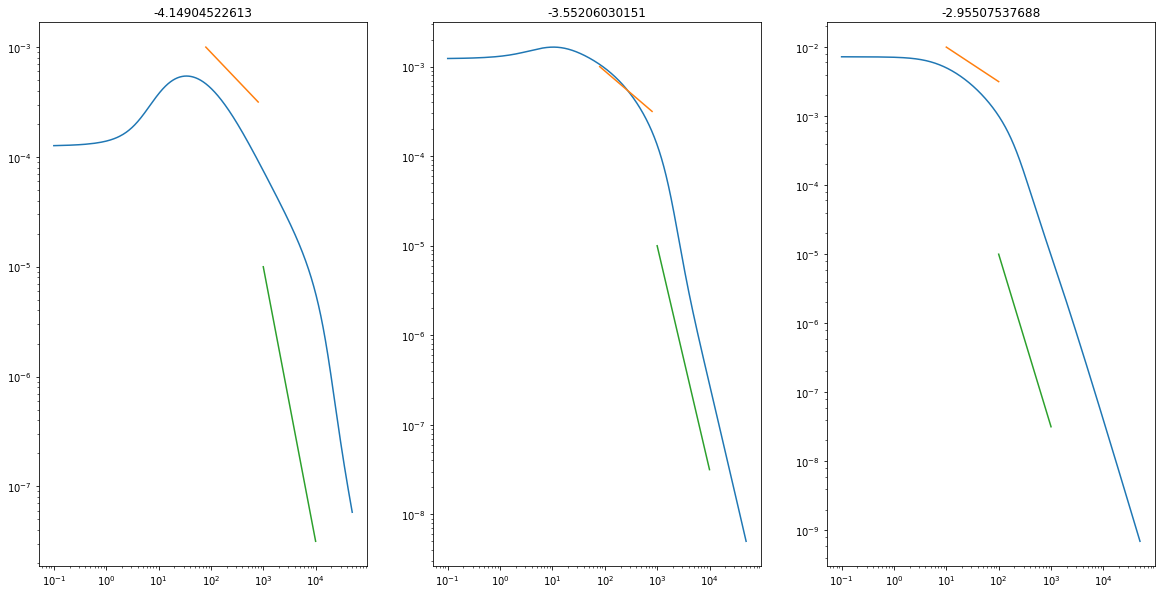

In [165]:
plt.figure(figsize=(20,10),facecolor='white')

u=uw(xa,L[2])
I=30
print(xa[I])
dx=xa[1]-xa[0]
Q=q(ha[:,I+1],ha[:,I],ha[:,I-1],u[I],u[I-1],dx)


a0=80
a1=800
b0=10**-3
b1=b0*(a1/a0)**-(.5)

c0=1000
c1=10000
d0=10**-5
d1=d0*(c1/c0)**-(5./2.)

plt.subplot(131)
plt.loglog(ta,Q)
plt.loglog([a0,a1],[b0,b1])
plt.loglog([c0,c1],[d0,d1])
plt.title(xa[I])

I=40
print(xa[I])
dx=xa[1]-xa[0]
Q=q(ha[:,I+1],ha[:,I],ha[:,I-1],u[I],u[I-1],dx)


a0=80
a1=800
b0=10**-3
b1=b0*(a1/a0)**-(.5)

c0=1000
c1=10000
d0=10**-5
d1=d0*(c1/c0)**-(5./2.)

plt.subplot(132)
plt.loglog(ta,Q)
plt.loglog([a0,a1],[b0,b1])
plt.loglog([c0,c1],[d0,d1])
plt.title(xa[I])

I=50
print(xa[I])
dx=xa[1]-xa[0]
Q=q(ha[:,I+1],ha[:,I],ha[:,I-1],u[I],u[I-1],dx)


a0=10
a1=100
b0=10**-2
b1=b0*(a1/a0)**-(.5)

c0=100
c1=1000
d0=10**-5
d1=d0*(c1/c0)**-(5./2.)

plt.subplot(133)
plt.loglog(ta,Q)
plt.loglog([a0,a1],[b0,b1])
plt.loglog([c0,c1],[d0,d1])
plt.title(xa[I])


plt.show()

In [182]:
hlong=np.load('../numerical/H.npy')
N=2000
l=100.
d=0.2
dx=(1/(.5*N))
x=np.linspace(-l+dx,l+dx,N)
u=uw(x,l)
t=np.linspace(0,400,101)*2*10**3

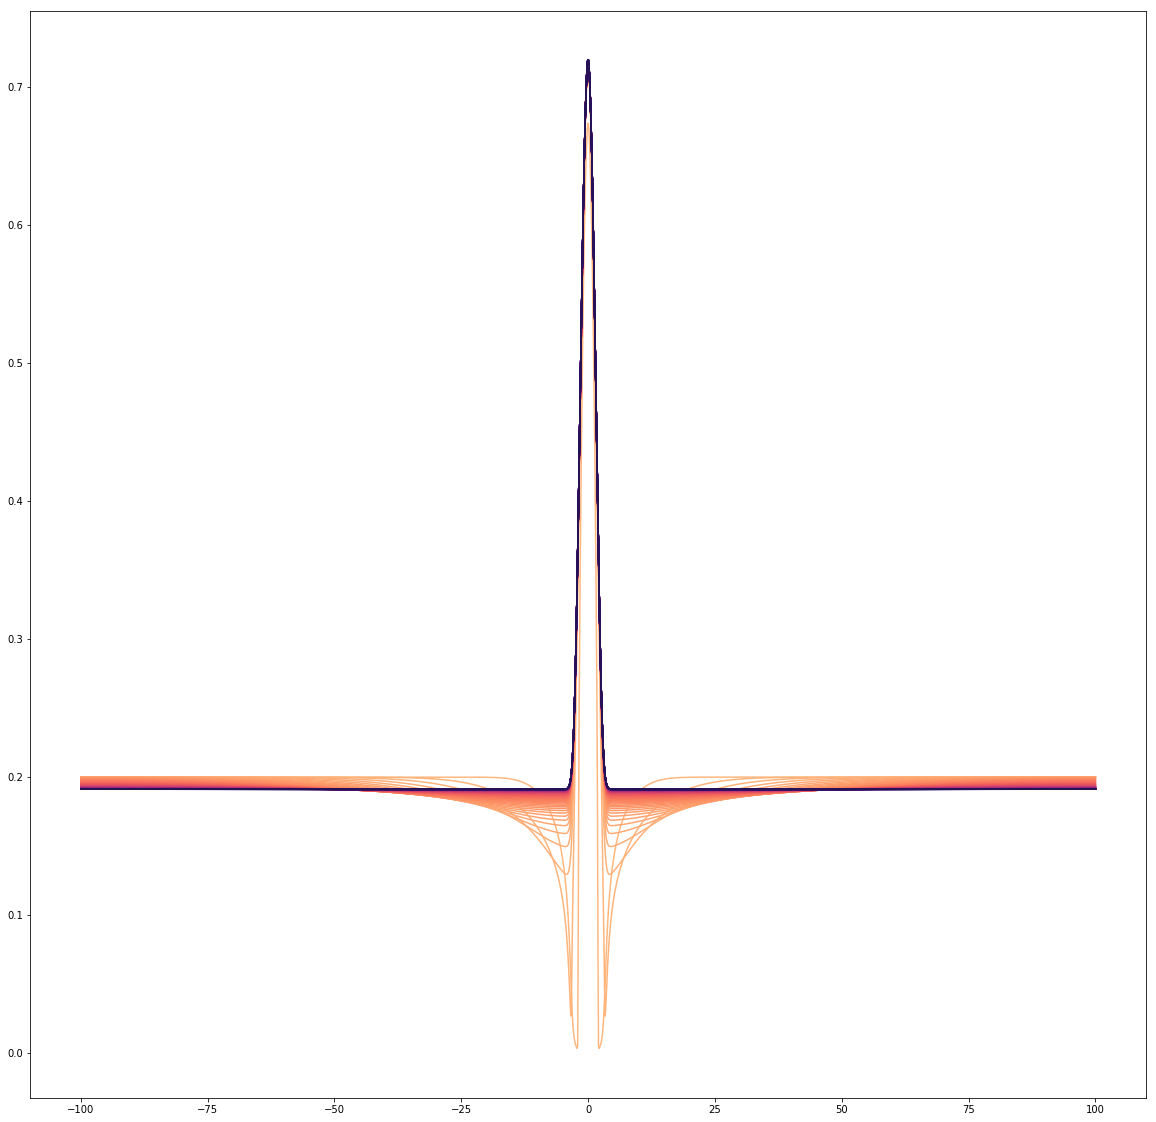

In [179]:
plt.figure(0,figsize=(20,20),facecolor='white')
c=np.linspace(.15,.85,101)
for ii in range(0,len(c)):
    plt.plot(x,hlong[ii],color=plt.cm.magma_r(c[ii]))
plt.show()

-19.95897999


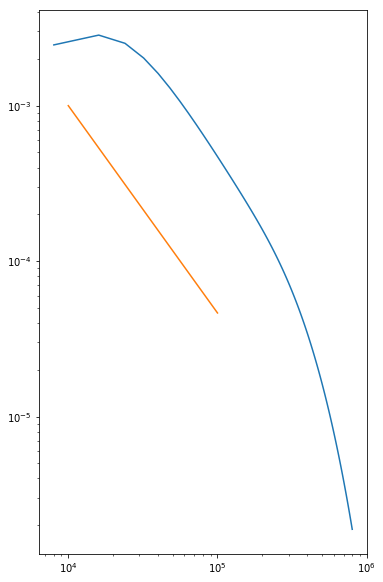

In [190]:
plt.figure(figsize=(20,10),facecolor='white')

u=uw(x,l)
I=800
print(x[I])
Q=q(hlong[:,I+1],hlong[:,I],hlong[:,I-1],u[I],u[I-1],dx)

a=10**4
b=10**5
c=10**-3
d=c*(b/a)**-(4/3.)

plt.subplot(131)
plt.loglog(t,Q)
plt.loglog([a,b],[c,d])
plt.show()

-4.14904522613


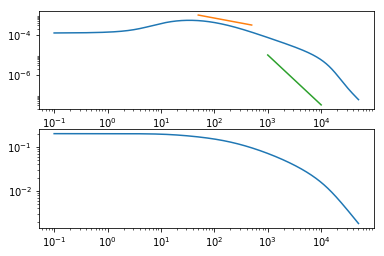

In [158]:
x=np.zeros(int(len(ta)/10))
V=np.zeros(int(len(ta)/10))
u=uw(xa,L[2])
I=30
print(xa[I])
dx=xa[1]-xa[0]
Q=q(ha[:,I+1],ha[:,I],ha[:,I-1],u[I],u[I-1],dx)


a0=50
a1=500
b0=10**-3
b1=b0*(a1/a0)**-(.5)

c0=1000
c1=10000
d0=10**-5
d1=d0*(c1/c0)**-(5./2.)

plt.subplot(211)
plt.loglog(ta,Q)
plt.loglog([a0,a1],[b0,b1])
plt.loglog([c0,c1],[d0,d1])

plt.subplot(212)
plt.loglog(ta,ha[:,I])

plt.show()

-2.95507537688


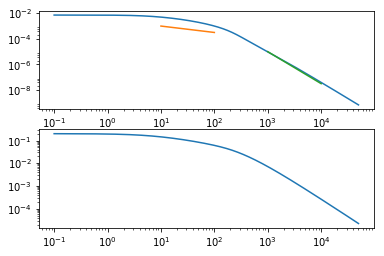

In [159]:
x=np.zeros(int(len(ta)/10))
V=np.zeros(int(len(ta)/10))
u=uw(xa,L[2])
I=50
print(xa[I])
dx=xa[1]-xa[0]
Q=q(ha[:,I+1],ha[:,I],ha[:,I-1],u[I],u[I-1],dx)


a0=10
a1=100
b0=10**-3
b1=b0*(a1/a0)**-(.5)

c0=1000
c1=10000
d0=10**-5
d1=d0*(c1/c0)**-(5./2.)

plt.subplot(211)
plt.loglog(ta,Q)
plt.loglog([a0,a1],[b0,b1])
plt.loglog([c0,c1],[d0,d1])

plt.show()

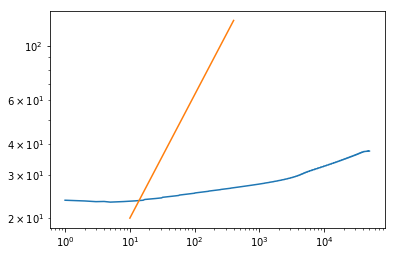

In [88]:
#VT=VV[1:]-VV[:-1]
plt.loglog(ta[::10],VV)
a0=10
a1=400
b0=20
b1=b0*(a1/a0)**.5

c0=2*10**3
c1=4*10**4
d0=0.001
d1=d0*(c1/c0)**(7./3.)

plt.loglog([a0,a1],[b0,b1])
#plt.loglog([c0,c1],[d0,d1])

plt.show()

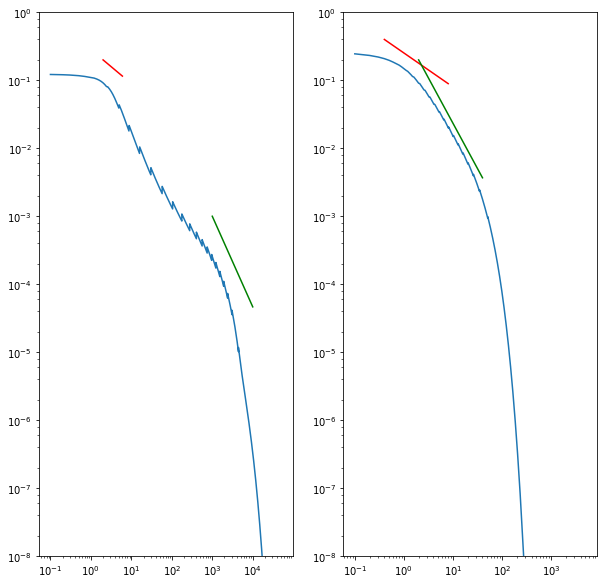

In [28]:


plt.figure(0,figsize=(10,10))

t20=2*10**0
t21=6*10**0
h20=2*10**(-1)
h21=h20*(t21/t20)**-.5

t40=10**3
t41=10**4
h40=10**(-3)
h41=h40*(t41/t40)**-(4./3)

plt.subplot(1,2,1)
plt.loglog(ta[1:],Vdota)
plt.plot([t20,t21],[h20,h21],'r-')
plt.plot([t40,t41],[h40,h41],'g-')
#plt.xlim([1,4])

plt.ylim([10**-8,10**0])

plt.subplot(1,2,2)

t20=0.4*10**0
t21=0.8*10**1
h20=4*10**(-1)
h21=h20*(t21/t20)**-.5

t40=0.2*10**1
t41=0.4*10**2
h40=2*10**(-1)
h41=h40*(t41/t40)**-(4./3)

plt.loglog(tb[1:],Vdotb)
plt.plot([t20,t21],[h20,h21],'r-')
plt.plot([t40,t41],[h40,h41],'g-')
plt.ylim([10**-8,10**0])
plt.show()

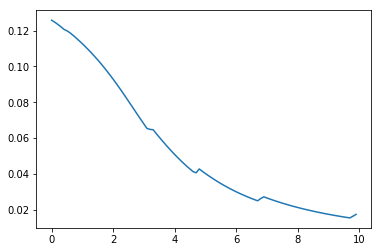

In [17]:
plt.plot(t[:100],Vdota[:100])
plt.show()

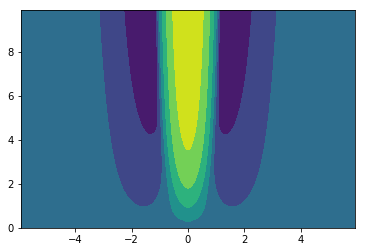

In [18]:
plt.contourf(xa,ta[:100],ha[:100])
plt.show()